In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import os
import numpy as np

In [5]:
# Load the dataset
file_path = '/Users/mi1296/Downloads/Online Retail 3.xlsx'
df = pd.read_excel(file_path)

In [12]:
# Convert the 'InvoiceDate' column to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract the date, time, year, and month components
df['Date'] = df['InvoiceDate'].dt.date
df['Time'] = df['InvoiceDate'].dt.time
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month

In [13]:
# Exclude records for the United Kingdom
df = df[df['Country'] != 'United Kingdom']

# Clean the data by removing values with quantity <= 0
df = df[df['Quantity'] > 0]
df = df[df['UnitPrice'] > 0]

# Remove outliers in 'Quantity' and 'UnitPrice' columns
quantity_outlier_threshold = np.percentile(df['Quantity'], 99)  # Adjust the percentile threshold as needed
unit_price_outlier_threshold = np.percentile(df['UnitPrice'], 99)  # Adjust the percentile threshold as needed

df = df[df['Quantity'] <= quantity_outlier_threshold]
df = df[df['UnitPrice'] <= unit_price_outlier_threshold]

# Add calculated field for TotalPrice
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Calculate relevant KPIs
total_revenue = df['TotalPrice'].sum()
total_customers = df['CustomerID'].nunique()
average_quantity = df['Quantity'].mean()
average_price = df['UnitPrice'].mean()

# Print the KPIs
print("Total Revenue: $", total_revenue)
print("Total Customers:", total_customers)
print("Average Quantity:", average_quantity)
print("Average Price: $", average_price)

Total Revenue: $ 1332656.1100000003
Total Customers: 416
Average Quantity: 16.472894592619657
Average Price: $ 3.1799920076722876


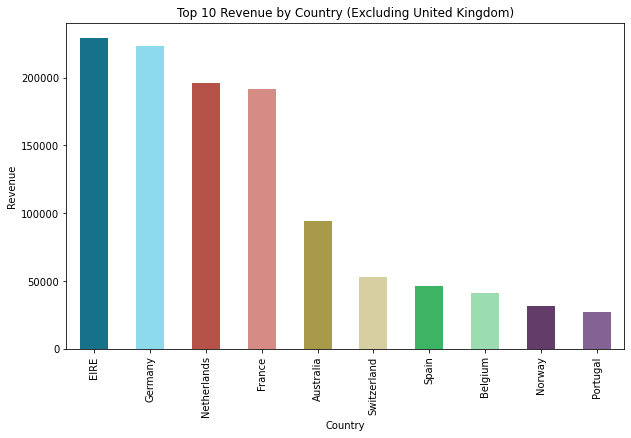

In [20]:
# Define the color palette
color_palette = ['#167288', '#8cdaec', '#b45248', '#d48c84', '#a89a49', '#d6cfa2', '#3cb464', '#9bddb1', '#643c6a', '#836394']

# Create a directory to store the downloaded visualizations
save_dir = '/Users/mi1296/Downloads/visualizations'
os.makedirs(save_dir, exist_ok=True)

# Bar chart for top 10 revenue by country
revenue_by_country_top = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
revenue_by_country_top.plot(kind='bar', color=color_palette[:10])
plt.xlabel('Country')
plt.ylabel('Revenue')
plt.title('Top 10 Revenue by Country (Excluding United Kingdom)')

plt.savefig(os.path.join(save_dir, 'top_revenue_by_country.png'))
plt.show()
plt.close()

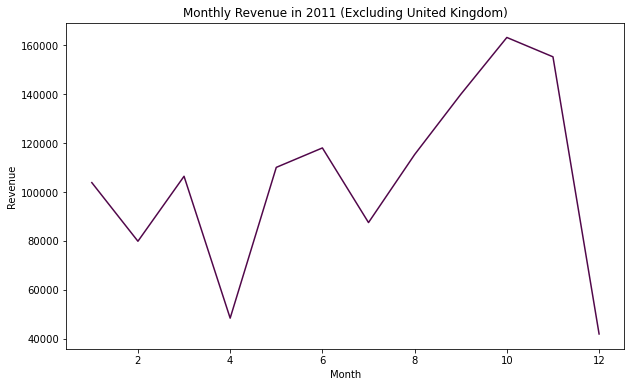

Revenue by Month:
Month 1: $103842.51
Month 2: $79872.14
Month 3: $106430.76
Month 4: $48426.14
Month 5: $110072.38
Month 6: $118018.71
Month 7: $87509.88
Month 8: $115315.29
Month 9: $139917.52
Month 10: $163187.09
Month 11: $155275.63
Month 12: $41955.77


In [32]:
# Line chart for yearly revenue in 2011
yearly_revenue_2011 = df[df['Year'] == 2011].groupby('Month')['TotalPrice'].sum()

plt.figure(figsize=(10, 6))
yearly_revenue_2011.plot(kind='line', color='#51074a')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Monthly Revenue in 2011 (Excluding United Kingdom)')

plt.savefig(os.path.join(save_dir, 'yearly_revenue_2011.png'))
plt.show()
plt.close()

# Print the revenue values as a list
print("Revenue by Month:")
for month, revenue in enumerate(yearly_revenue_2011):
    print(f"Month {month+1}: ${revenue:.2f}")

<Figure size 720x432 with 0 Axes>

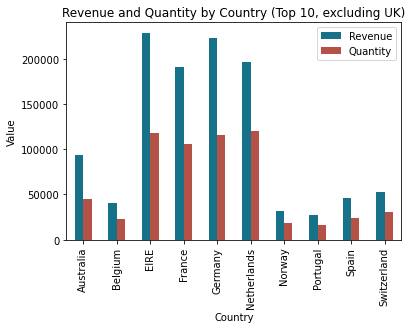

In [33]:
# Side-by-side bar chart for revenue and quantity by country (Top 10, excluding UK)
top_countries = df[df['Country'] != 'United Kingdom'].groupby('Country')['TotalPrice'].sum().nlargest(10).index
top_countries_data = df[df['Country'].isin(top_countries)].groupby(['Country'])[['TotalPrice', 'Quantity']].sum()

plt.figure(figsize=(10, 6))
top_countries_data.plot(kind='bar', stacked=False, color=['#167288', '#b45248'])
plt.xlabel('Country')
plt.ylabel('Value')
plt.title('Revenue and Quantity by Country (Top 10, excluding UK)')
plt.legend(['Revenue', 'Quantity'])

plt.savefig(os.path.join(save_dir, 'revenue_quantity_by_country.png'))
plt.show()
plt.close()

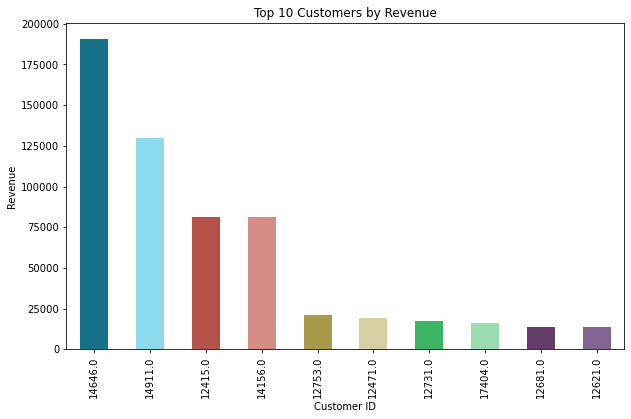

In [23]:
# Vertical bar chart for top 10 customers by revenue
customer_revenue = df[df['CustomerID'].notnull()].groupby('CustomerID')['TotalPrice'].sum().nlargest(10)

plt.figure(figsize=(10, 6))
customer_revenue.plot(kind='bar', color=color_palette[:10])
plt.xlabel('Customer ID')
plt.ylabel('Revenue')
plt.title('Top 10 Customers by Revenue')

plt.savefig(os.path.join(save_dir, 'top_customers_by_revenue.png'))
plt.show()
plt.close()

<Figure size 864x576 with 0 Axes>

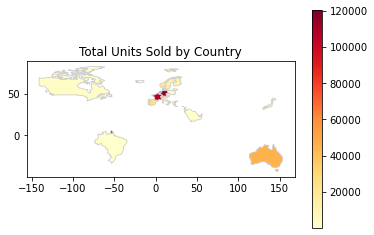

In [34]:
# Map chart of total units sold by country (excluding UK)
units_sold_by_country = df[df['Country'] != 'United Kingdom'].groupby('Country')['Quantity'].sum().reset_index()
world_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
merged_data = world_map.merge(units_sold_by_country, left_on='name', right_on='Country', how='left')

plt.figure(figsize=(12, 8))
merged_data.plot(column='Quantity', cmap='YlOrRd', linewidth=0.8, edgecolor='0.8', legend=True)
plt.title('Total Units Sold by Country')

plt.savefig(os.path.join(save_dir, 'total_units_sold_by_country.png'))
plt.show()
plt.close()